## Import libraries

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

## Load data

In [2]:
os.getcwd()

'c:\\Users\\james\\Documents\\projects\\pred-knee-replacement-oai\\notebooks'

In [3]:
# Set raw data location
DATA_RAW_LOC = "./../data/raw"

In [4]:
# Set path for image and segmentation - 1 example
fname_img = DATA_RAW_LOC + '/valid_001_V00.im'
fname_seg = DATA_RAW_LOC + '/valid_001_V00.seg'

### HDF5
- Images are in HDF5 format 
- HDF5 - *hierarchical data format* - verison 5
- HDF5 is like a file system within a file: it has a root path and datasets are underneath directories
- Two key objects:
    - Datasets
    - Groups

- Datasets can be chunked:
    - Linear vs chunked
    - Don't have to read whole file - faster

- HDF5 filters:
    - Every time you write/read, it first passes thorugh the filter and is read/written
    - Takes CPU processing
    - Can increase efficiency by reducing disk I/O 
    - Filter example: gzip
        - Compression algorithm - takes data and compresses it
 

In [5]:
# Images are in HDF5 format 

# Load in fname_img using h5py and convert to numpy array
with h5py.File(fname_img,'r') as hf:
    print(f"data type: {type(hf)}")
    img = np.array(hf['data'])


print(f"Image shape: {img.shape}")

data type: <class 'h5py._hl.files.File'>
Image shape: (384, 384, 160)


In [6]:
# Check type of output
print(type(img))

# Check flattend output size 
print(img.flatten().shape)

<class 'numpy.ndarray'>
(23592960,)


In [7]:
print(f"Max image value: {max(img.flatten())}")
print(f"Min image value: {min(img.flatten())}")

Max image value: 0.01721217669546604
Min image value: 0.0


## Plotting: images slices

In [10]:
num_subplots = 5

for cnt, slnum in enumerate(range(0,img.shape[-1],img.shape[-1]//num_subplots**2)):
    print(cnt, slnum)

0 0
1 6
2 12
3 18
4 24
5 30
6 36
7 42
8 48
9 54
10 60
11 66
12 72
13 78
14 84
15 90
16 96
17 102
18 108
19 114
20 120
21 126
22 132
23 138
24 144
25 150
26 156


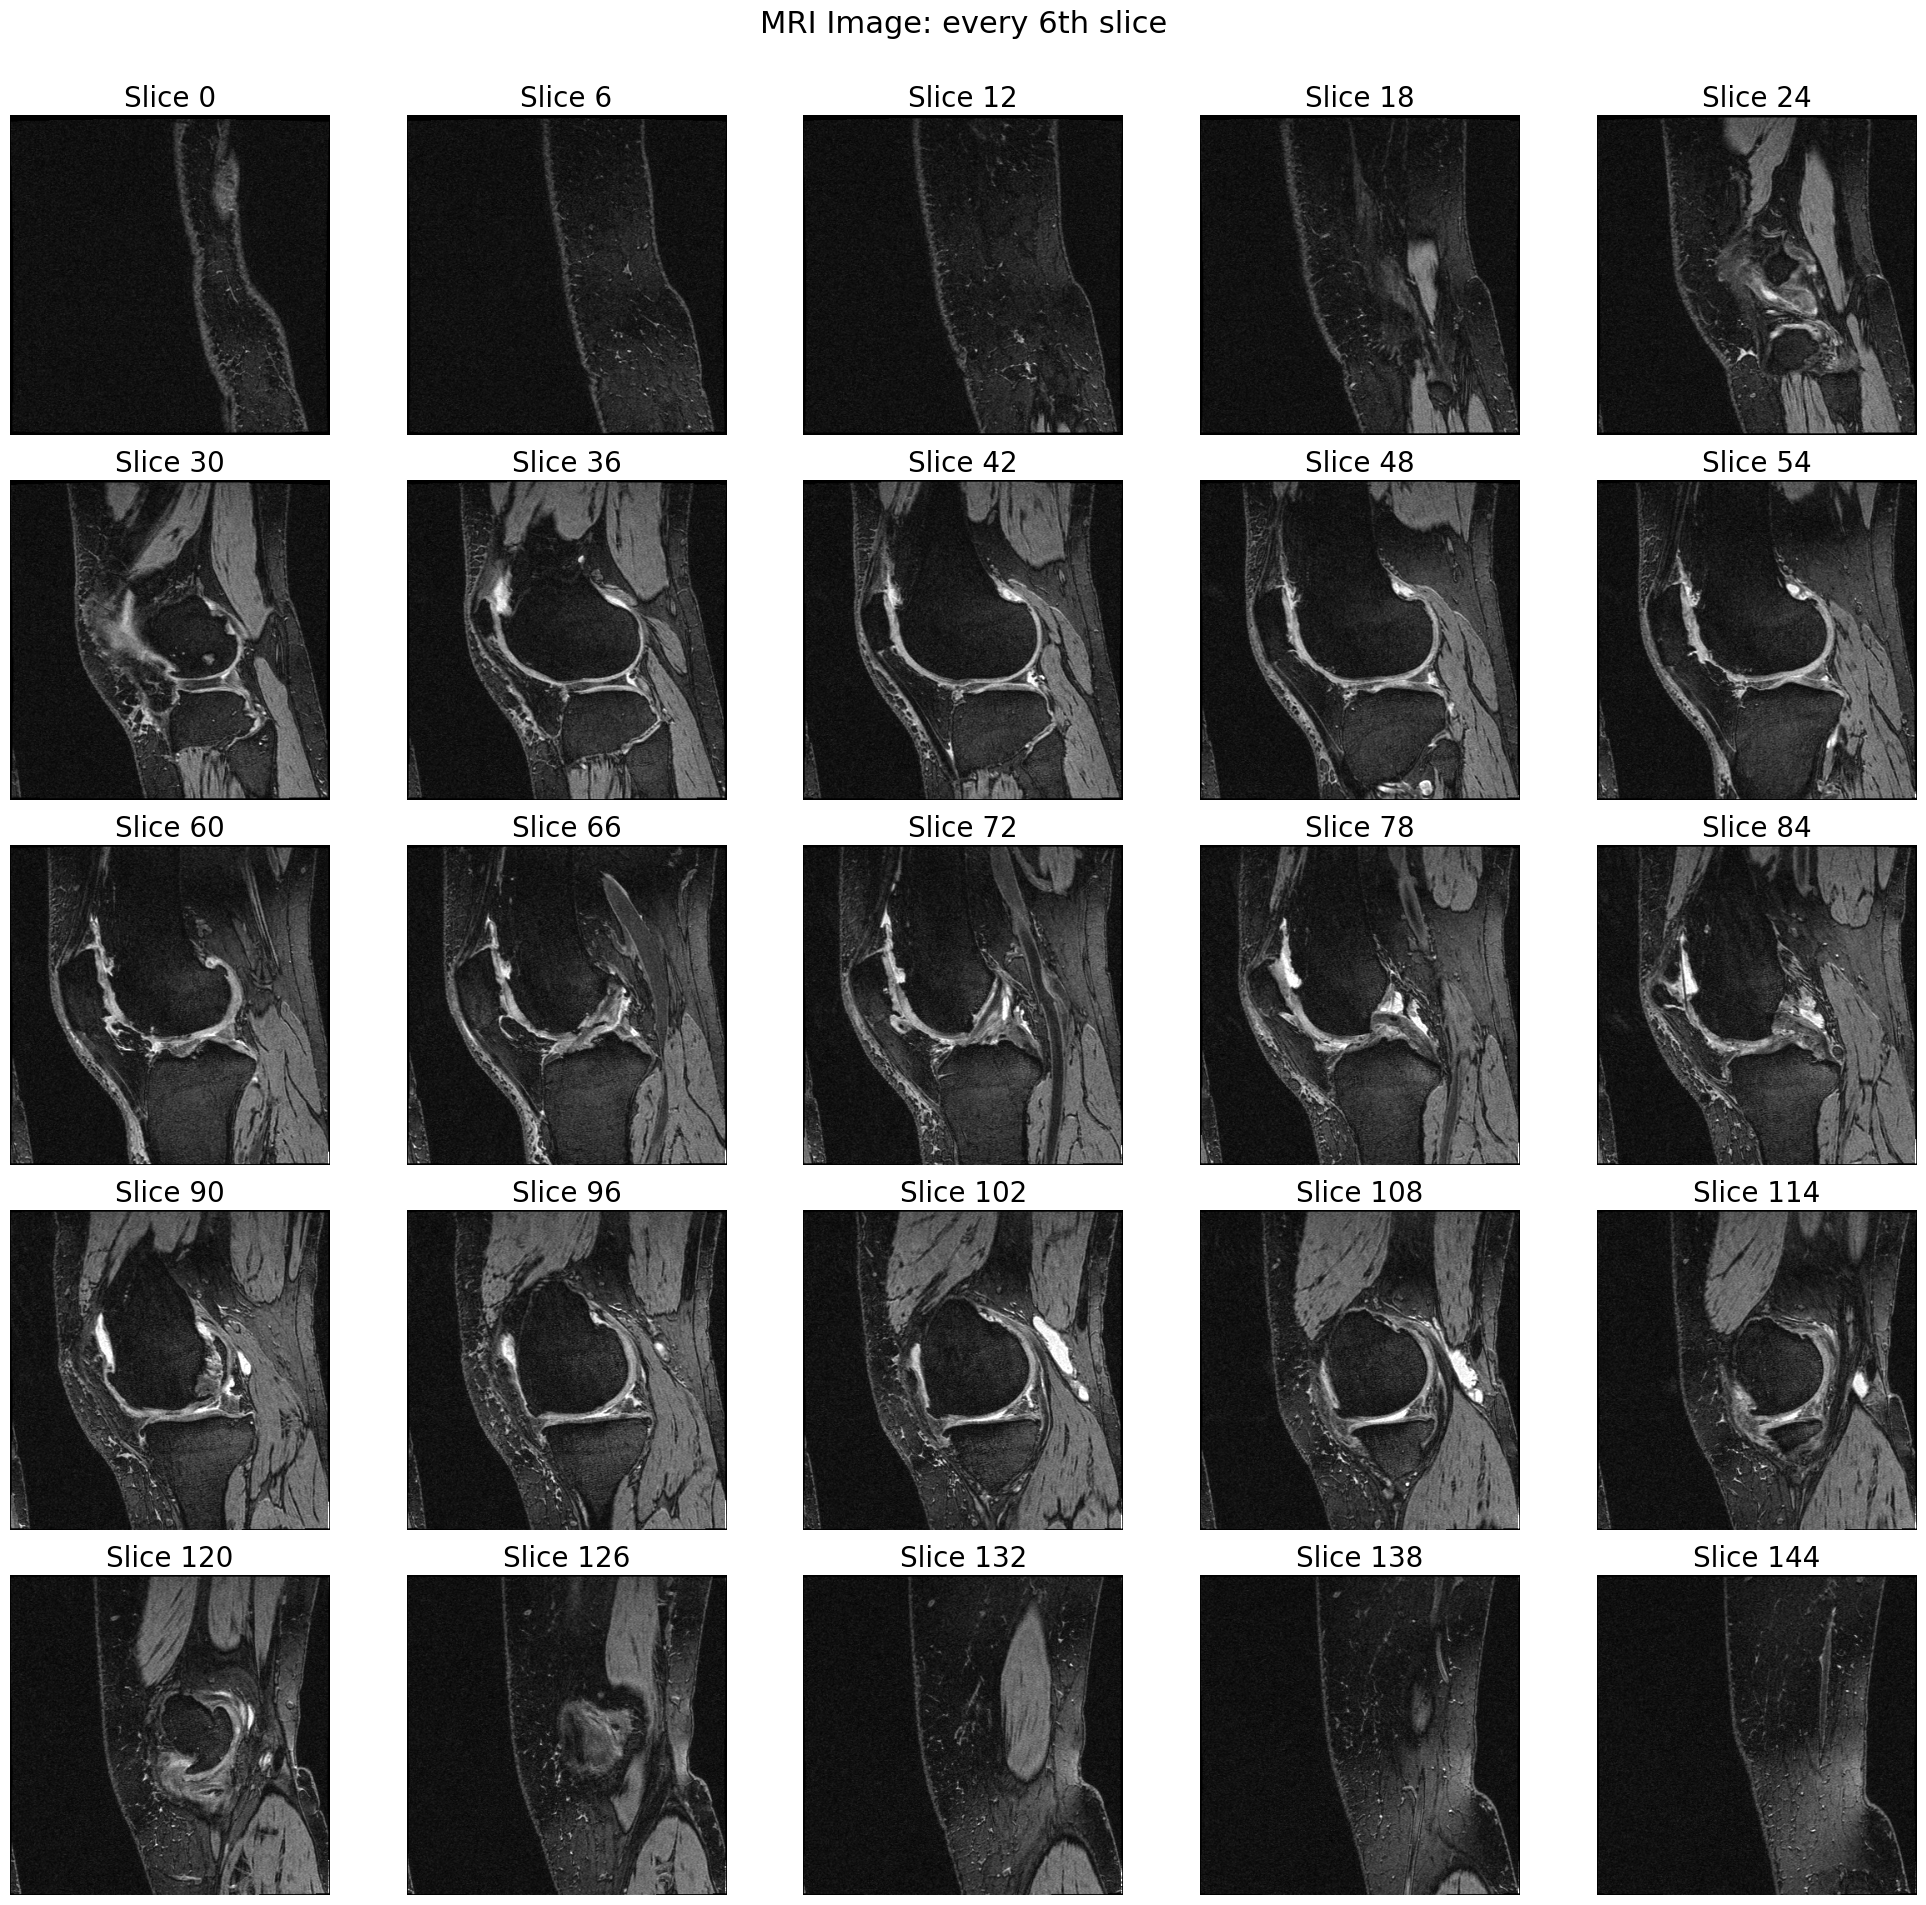

In [9]:
# Define nmber of horizontal and vertical subplots
num_subplots = 5

# Define subplots as num_subplots x num_subplots grid - figure size also defined as a multiple subplots
plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))

# Step size is num_slices / num_subplots
step_size = img.shape[-1]//num_subplots**2

# From 0 to the final slice (160) in 
for cnt, slnum in enumerate(range(0,img.shape[-1],step_size)):

    # If your still in the first num_subplots x num_subplots iterations 
    if cnt < num_subplots**2:

        # For the relevant subplot
        plt.subplot(num_subplots, num_subplots, cnt+1)
        
        # Plot the relevant slice number, visualising values in the range 0 to 0.005
        plt.imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
        plt.title('Slice {}'.format(slnum), fontsize= 20)
        plt.axis('off')
        

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle(f"MRI Image: every {step_size}th slice", fontsize=22)
plt.show()

## Plotting: mean of segmentations masks (six cartilage types)

In [58]:
# Load in segmentation
with h5py.File(fname_seg,'r') as hf:
    seg = np.array(hf['data'])

Each segmentation map is a numpy array of 384x384x160x6

384 x 384 = image size \
160 = number of slices \
6 = number of segmentation maps for each type of cartilage

In [47]:
# Check segmentation shape
seg.shape

(384, 384, 160, 6)

In [59]:
# Calculate the mean of each slice at each xy coord for each cartilage type
seg_means = np.mean(seg, 2)
seg_means.shape

(384, 384, 6)

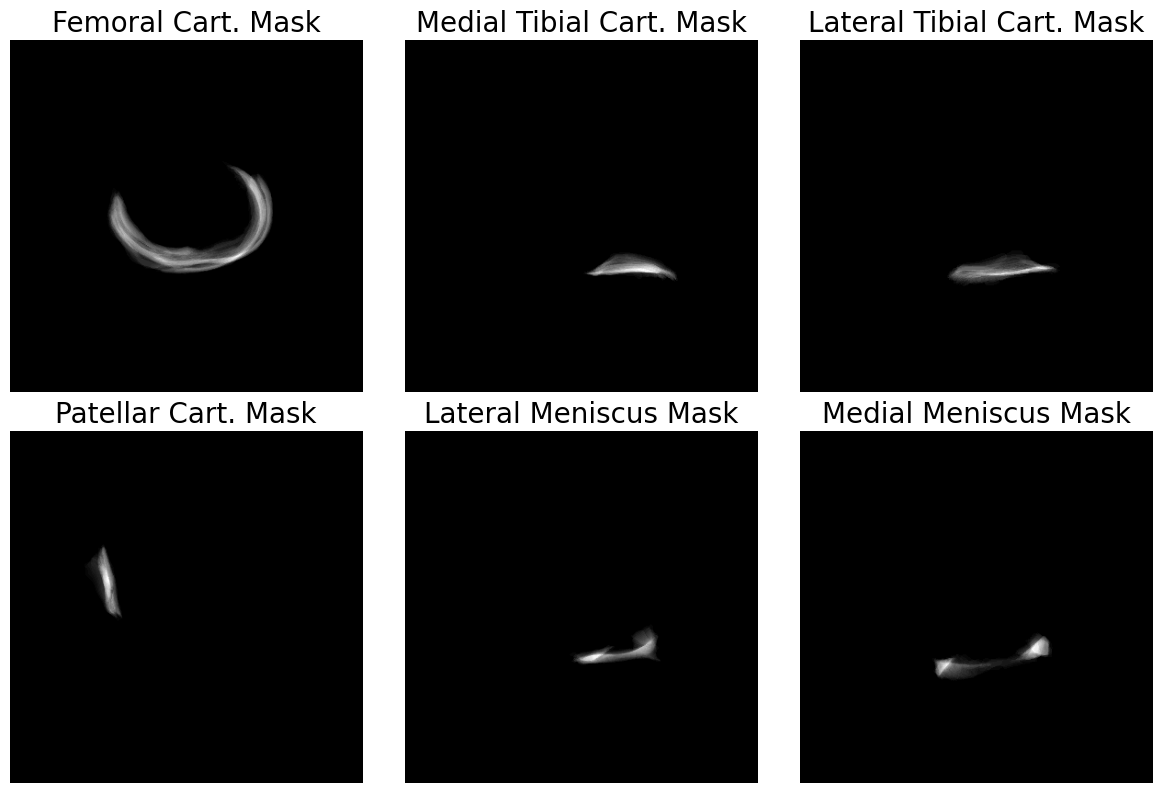

In [63]:
# For each cartilage type, plot the slice-averaged segmentation mask

# Define cartilage labels
fig_captions = ['Femoral Cart.', 'Medial Tibial Cart.', 'Lateral Tibial Cart.', 'Patellar Cart.', 'Lateral Meniscus', 'Medial Meniscus']

# Set up subplots
nrows = 2
ncols = 3
plt.subplots(nrows, ncols, figsize = (ncols*4, nrows*4))

# For each cartilage type
for cnt, cart_type in enumerate(range(0,6)):
    
    # Access the subplots
    plt.subplot(nrows, ncols, cnt+1)
    # Plot the mean of all the segmentation maps for the cartilage type
    plt.imshow(seg_means[...,cart_type], cmap = 'gray')
    plt.title('{} Mask'.format(fig_captions[cnt]), fontsize = 20)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [74]:
# Define each tissue mask
fem_cart = seg[:,:,:,0]
tib_med_cart = seg[:,:,:,1]
tib_lat_cart = seg[:,:,:,2]
pat_cart = seg[:,:,:,3]
men_lat_men = seg[:,:,:,4]
men_med_men = seg[:,:,:,5]

# Check shape
fem_cart.shape


(384, 384, 160)

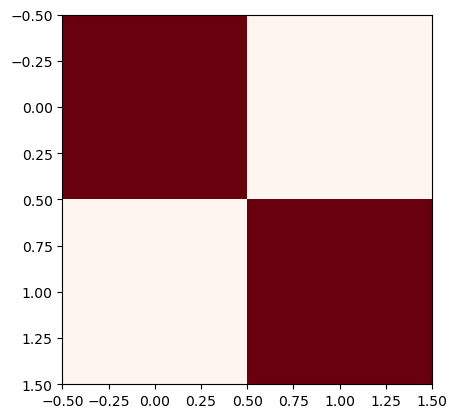

In [80]:
test = np.array([[1,0],[0,1]])

plt.imshow(test, cmap='Reds')


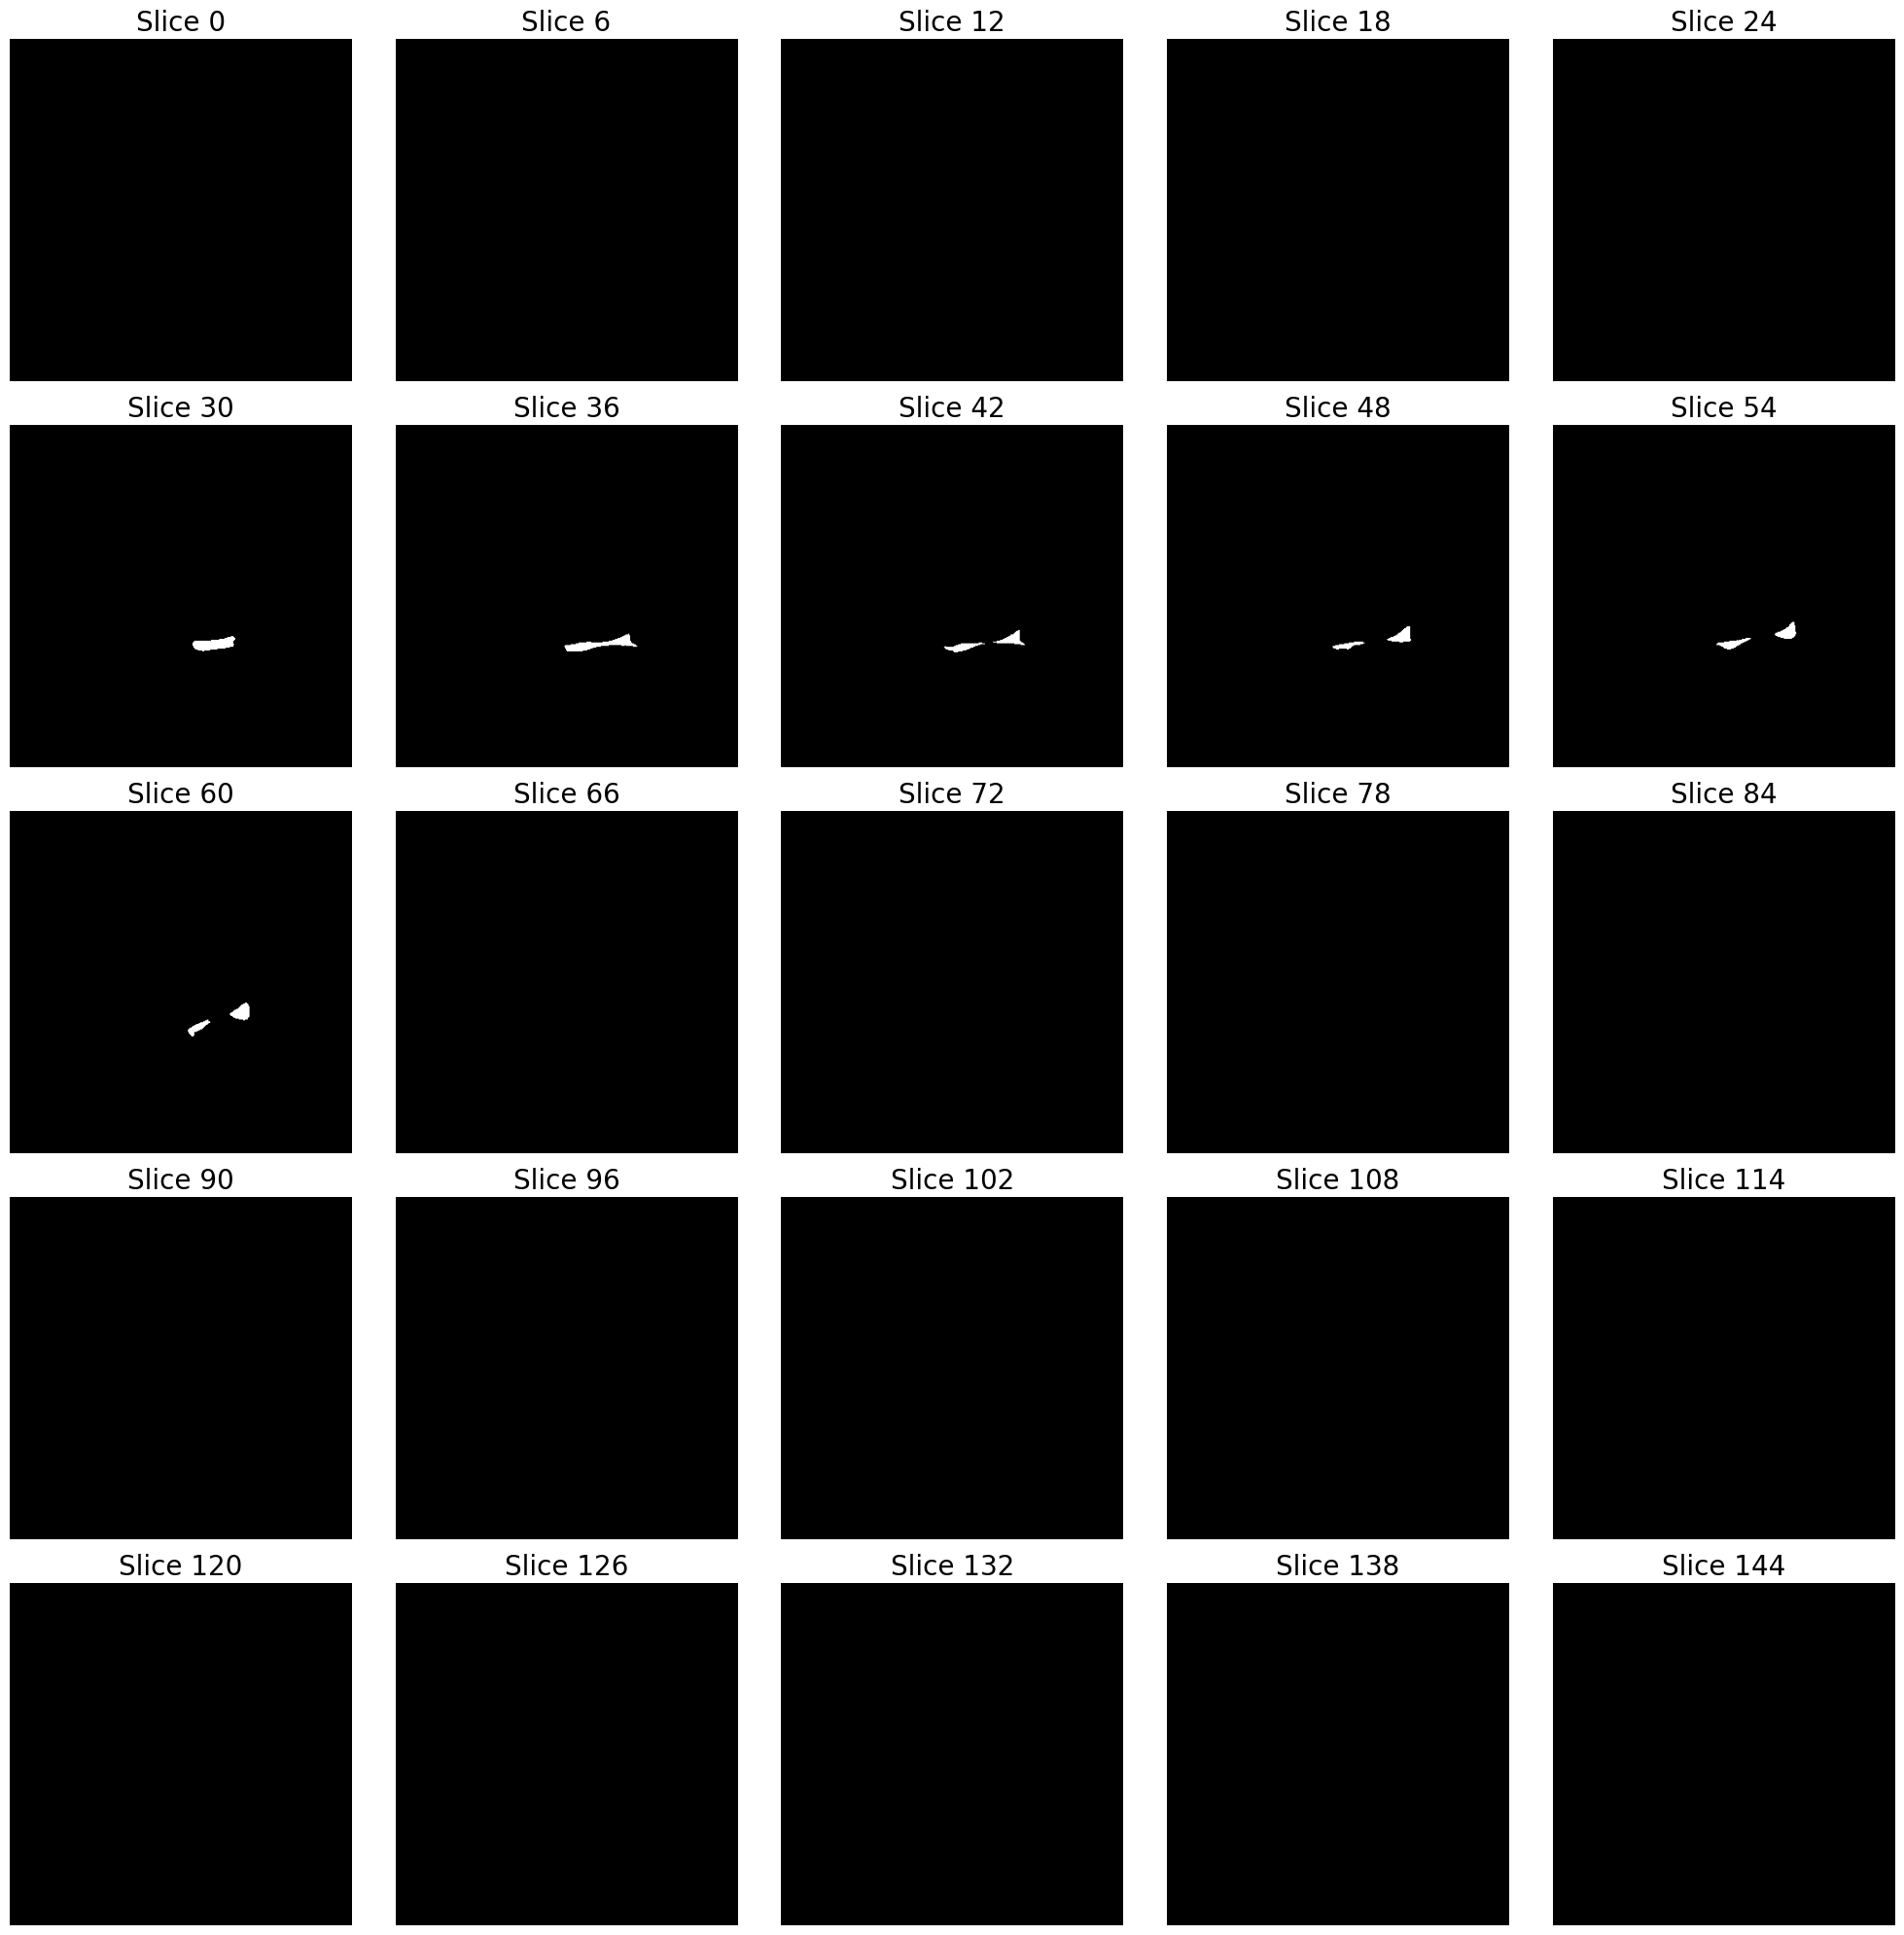

In [72]:
num_subplots = 5
plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))

for cnt, slnum in enumerate(range(0,lateral.shape[-1],lateral.shape[-1]//num_subplots**2)):

    if cnt < num_subplots**2:

        plt.subplot(num_subplots, num_subplots, cnt+1)
        plt.imshow(lateral[...,slnum], cmap = 'gray')
        plt.title('Slice {}'.format(slnum), fontsize= 20)
        plt.axis('off')

plt.tight_layout()
plt.show()

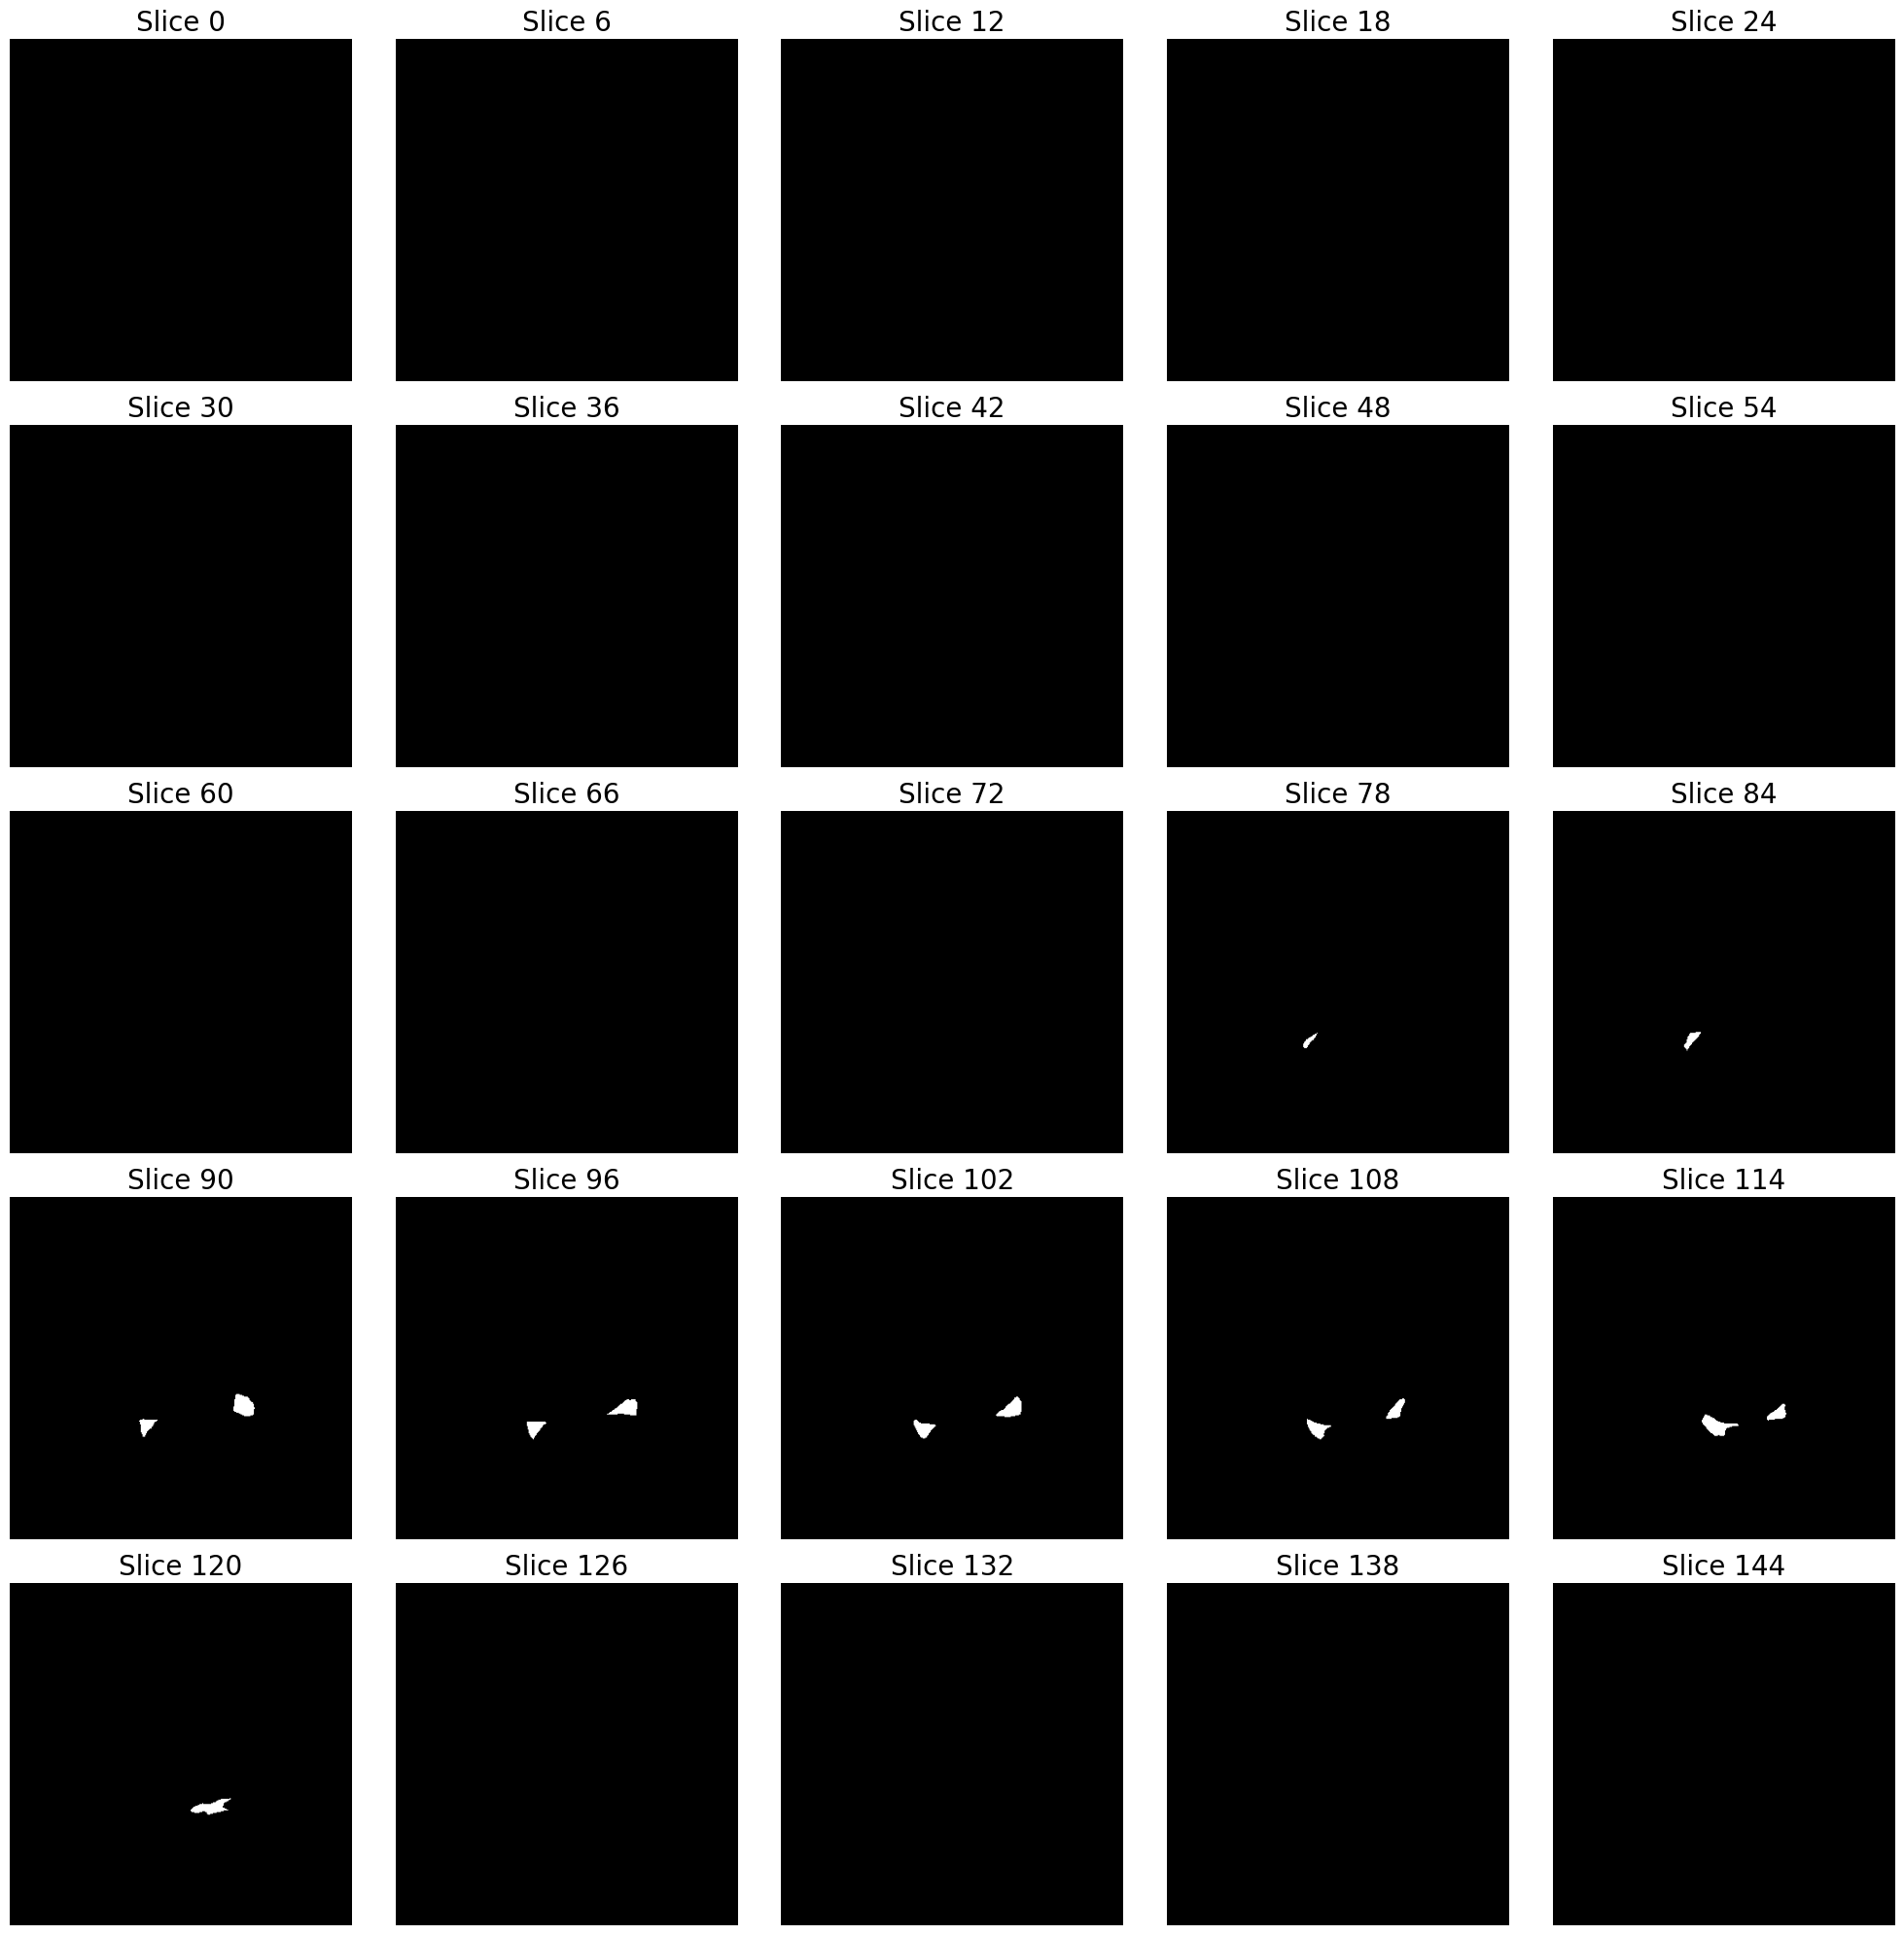

In [ ]:
num_subplots = 5
plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))

for cnt, slnum in enumerate(range(0,medial.shape[-1],medial.shape[-1]//num_subplots**2)):

    if cnt < num_subplots**2:

        plt.subplot(num_subplots, num_subplots, cnt+1)
        plt.imshow(medial[...,slnum], cmap = 'gray')
        plt.title('Slice {}'.format(slnum), fontsize= 20)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [81]:
seg.shape

(384, 384, 160, 6)

In [104]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

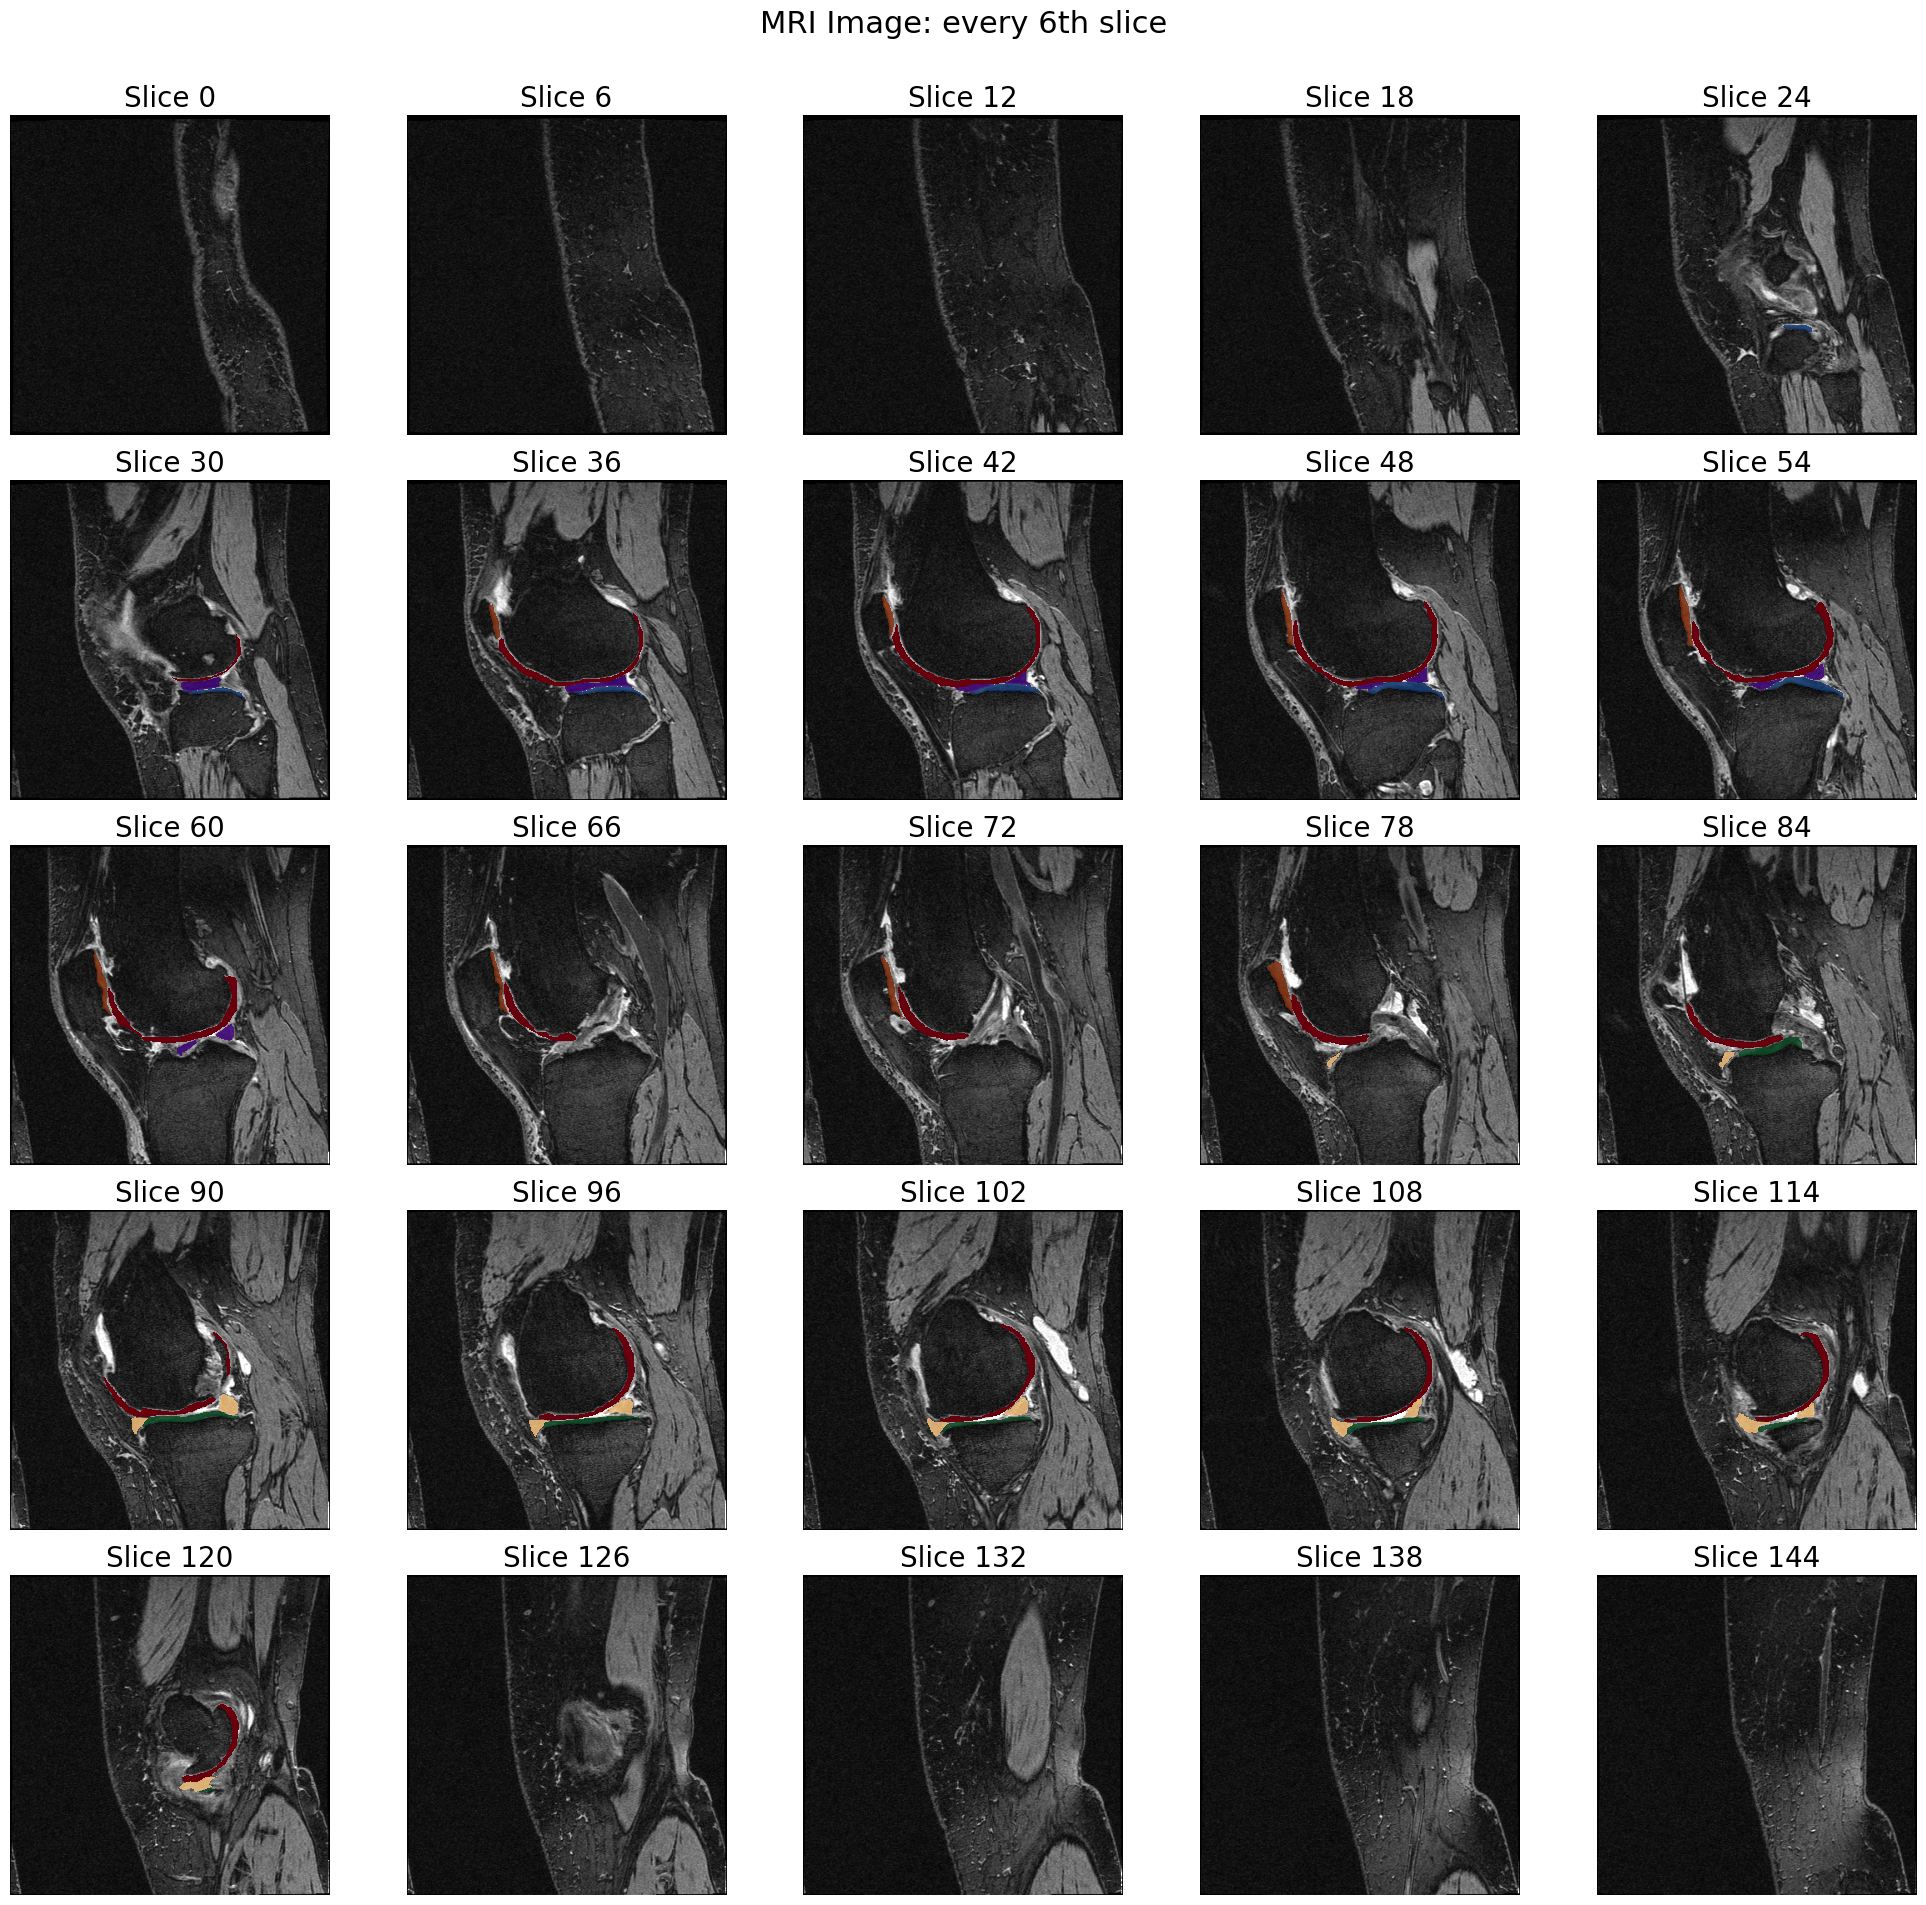

In [108]:
cmaps = ["Reds", "Blues", "Greens", "Oranges", "Purples", "copper"]
fig_captions = ['Femoral Cart.', 'Medial Tibial Cart.', 'Lateral Tibial Cart.', 'Patellar Cart.', 'Lateral Meniscus', 'Medial Meniscus']

# Define nmber of horizontal and vertical subplots
num_subplots = 5

# Define subplots as num_subplots x num_subplots grid - figure size also defined as a multiple subplots
plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))

# Step size is num_slices / num_subplots
step_size = img.shape[-1]//num_subplots**2

# From 0 to the final slice (160) in 
for cnt, slnum in enumerate(range(0,img.shape[-1],step_size)):

    # If your still in the first num_subplots x num_subplots iterations 
    if cnt < num_subplots**2:

        # For the relevant subplot
        plt.subplot(num_subplots, num_subplots, cnt+1)
        
        # Plot the relevant slice number, visualising values in the range 0 to 0.005
        plt.imshow(img[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')

        # Plot segmentation maps
        plt.imshow(seg[:,:,slnum, 0], cmap = 'Reds', alpha=1.0*(seg[:,:,slnum, 0]>0), interpolation='none')
        
        for tis_num in range(0, seg.shape[-1]):
            #plt.subplot(num_subplots, num_subplots, cnt+1)
            plt.imshow(seg[:,:,slnum, tis_num], cmap = cmaps[tis_num], alpha=0.8*(seg[:,:,slnum, tis_num]>0), interpolation='none')
            #plt.title('Slice {}'.format(slnum), fontsize= 20)
            #plt.axis('off')

        # plt.tight_layout()
        # plt.show()

        plt.title('Slice {}'.format(slnum), fontsize= 20)
        plt.axis('off')
        

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle(f"MRI Image: every {step_size}th slice", fontsize=22)
plt.show()

In [ ]:
# How much of the image does the meniscus span?

In [ ]:
def spans(mask):
    # Find the indices of non-zero elements in the binary mask
    nonzero_indices = np.nonzero(mask)

    # Calculate the minimum and maximum coordinates in each dimension
    min_coords = np.min(nonzero_indices, axis=1)
    max_coords = np.max(nonzero_indices, axis=1)

    return min_coords[0], max_coords[0], min_coords[1], max_coords[1], min_coords[2], max_coords[2]

In [ ]:
spans(lateral)

(211, 255, 179, 277, 27, 64)

In [ ]:
import glob
import os

# Loop through all train/val data and see variation in each span
DATA_DIR = 'Data'

# Get the paths
train_paths = np.array([i for i in glob.glob(f'{DATA_DIR}/train/*.seg')])
val_paths = np.array([i for i in glob.glob(f'{DATA_DIR}/valid/*.seg')])

print(train_paths.size)

all_paths = np.concatenate((train_paths, val_paths), axis=0)

120


In [ ]:
all_paths.size

148

In [ ]:
entries = []

for path in all_paths:
    entry = []
    entry.append(path)

    # load in file
    with h5py.File(path,'r') as hf:
        seg = np.array(hf['data'])

    # get masks
    medial = seg[...,-1]
    lateral = seg[...,-2]

    # Do the span function
    medspan = spans(medial)
    latspan = spans(lateral)

    # append to entry
    for i in latspan:
        entry.append(i)
    for i in medspan:
        entry.append(i)
    print(entry)

    entries.append(entry)

['Data/train/train_001_V00.seg', 202, 233, 151, 262, 78, 126, 211, 248, 137, 256, 21, 67]
['Data/train/train_001_V01.seg', 186, 226, 141, 252, 95, 140, 200, 235, 127, 242, 34, 79]
['Data/train/train_002_V00.seg', 148, 187, 163, 275, 81, 136, 153, 202, 121, 278, 17, 70]
['Data/train/train_002_V01.seg', 191, 234, 179, 290, 79, 138, 202, 250, 144, 298, 16, 69]
['Data/train/train_003_V00.seg', 215, 254, 154, 272, 19, 63, 225, 266, 135, 279, 92, 135]
['Data/train/train_003_V01.seg', 201, 244, 138, 255, 18, 65, 216, 260, 118, 263, 92, 136]
['Data/train/train_004_V00.seg', 208, 237, 146, 250, 24, 71, 183, 245, 110, 282, 93, 140]
['Data/train/train_004_V01.seg', 194, 221, 160, 265, 23, 74, 177, 233, 127, 295, 93, 140]
['Data/train/train_005_V00.seg', 218, 258, 158, 255, 27, 71, 226, 267, 125, 259, 92, 132]
['Data/train/train_005_V01.seg', 202, 241, 154, 248, 24, 74, 209, 256, 119, 251, 91, 133]
['Data/train/train_006_V00.seg', 212, 252, 147, 249, 17, 68, 225, 263, 107, 260, 84, 136]
['Data/tra

In [ ]:
import pandas as pd
df = pd.DataFrame(entries)

In [ ]:
import pandas as pd
df = pd.read_csv('maskspans.csv')

In [ ]:
df.head()

Unnamed: 0                             0    1    2    3    4   5    6    7  \
0           0  Data/train/train_001_V00.seg  202  233  151  262  78  126  211   
1           1  Data/train/train_001_V01.seg  186  226  141  252  95  140  200   
2           2  Data/train/train_002_V00.seg  148  187  163  275  81  136  153   
3           3  Data/train/train_002_V01.seg  191  234  179  290  79  138  202   
4           4  Data/train/train_003_V00.seg  215  254  154  272  19   63  225   

     8    9   10  11   12  
0  248  137  256  21   67  
1  235  127  242  34   79  
2  202  121  278  17   70  
3  250  144  298  16   69  
4  266  135  279  92  135

In [ ]:
df.to_csv('maskspans.csv')

In [ ]:
!ls

colab_sam  Data  data_loader.ipynb  maskspans.csv  Unet  Untitled1.ipynb


(array([ 3.,  4.,  6., 18., 24., 32., 27., 18., 10.,  6.]),
 array([198. , 207.1, 216.2, 225.3, 234.4, 243.5, 252.6, 261.7, 270.8,
        279.9, 289. ]),
 <BarContainer object of 10 artists>)

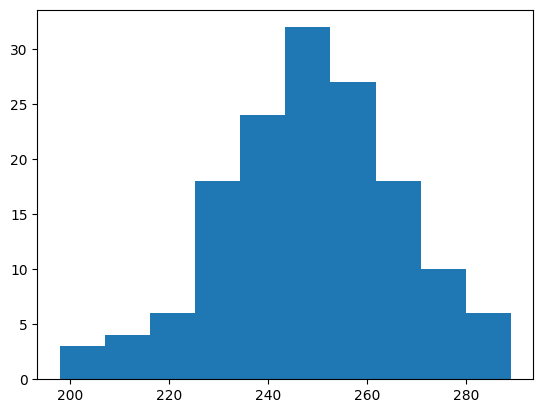

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['8'])

In [ ]:
df.agg([min, max])

Unnamed: 0                             0    1    2    3    4    5    6  \
min           0  Data/train/train_001_V00.seg  148  187  122  232   10   53   
max         147  Data/valid/valid_014_V01.seg  246  284  193  293  105  148   

       7    8    9   10   11   12  
min  153  198   91  230   12   59  
max  253  289  222  304  104  147

In [ ]:
# total region all masks span
# dim1
dim1 = (min(min(df['1']), min(df['7'])), max(max(df['2']), max(df['8'])))
dim2 = (min(min(df['3']), min(df['9'])), max(max(df['4']), max(df['10'])))
dim3 = (min(min(df['5']), min(df['11'])), max(max(df['6']), max(df['12'])))

In [ ]:
dim1, dim2, dim3

((148, 289), (91, 304), (10, 148))

In [ ]:
dim1[1]-dim1[0]

141

In [ ]:
dim2[1]-dim2[0]

213

In [ ]:
dim3[1]-dim3[0]

138

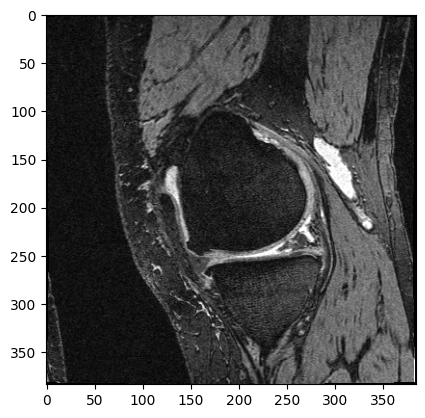

In [ ]:
# let's practice clipping, normalising and showing image
plt.imshow(img[...,100], vmin=0, vmax=0.005, cmap='gray')
plt.show()

In [ ]:
def crop_im(image):
    dim1_lower, dim1_upper = 120, 320
    dim2_lower, dim2_upper = 70, 326

    cropped = image[dim1_lower:dim1_upper, dim2_lower:dim2_upper, :]

    return cropped

In [ ]:
crop = crop_im(img)

In [ ]:
crop.shape

(200, 256, 160)

In [ ]:
def clip_and_norm(image, upper_bound):
    # Clip intensity values
    image = np.clip(image, 0, upper_bound)

    # Normalize the image to the range [0, 1]
    norm = (image - 0) / (upper_bound - 0)

    return norm

In [ ]:
norm_im = clip_and_norm(crop, 0.005)

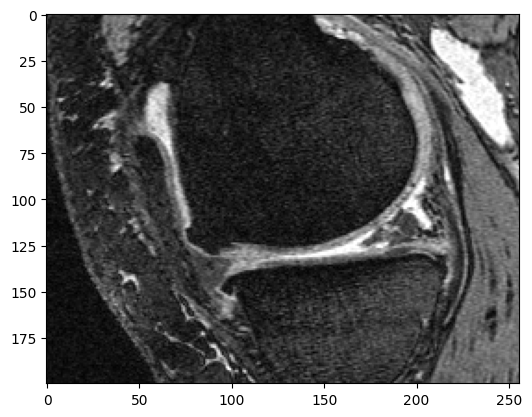

In [ ]:
plt.imshow(norm_im[...,100], cmap='gray')
plt.show()

In [ ]:
medial.shape
med_crop = crop_im(medial)

In [ ]:
lateral.shape
lat_crop = crop_im(lateral)

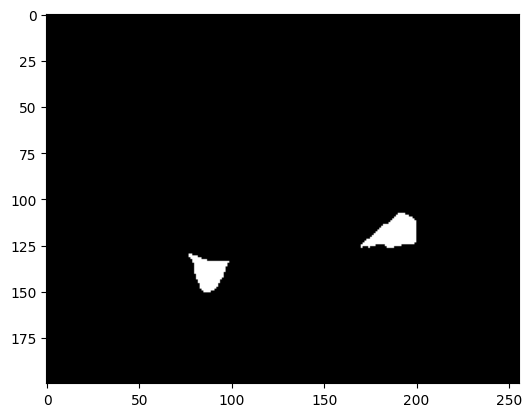

In [ ]:
plt.imshow(med_crop[...,100], cmap='gray')
plt.show()